#### Homework 2 - 孟念， Niklas Muennighoff

In [1]:
!unzip /content/naive_bayes_data.zip

Archive:  /content/naive_bayes_data.zip
   creating: naive_bayes_data/
  inflating: naive_bayes_data/vocabulary.csv  
  inflating: naive_bayes_data/XTest.csv  
  inflating: naive_bayes_data/XTrain.csv  
  inflating: naive_bayes_data/yTest.csv  
  inflating: naive_bayes_data/yTrain.csv  


In [24]:
import numpy as np

voc = open("/content/naive_bayes_data/vocabulary.csv").read().split("\n")
#np.genfromtxt("/content/naive_bayes_data/vocabulary.csv", delimiter=',')

x_train = np.genfromtxt("/content/naive_bayes_data/XTrain.csv", delimiter=',')
y_train = np.genfromtxt("/content/naive_bayes_data/yTrain.csv", delimiter=',')

x_test = np.genfromtxt("/content/naive_bayes_data/XTest.csv", delimiter=',')
y_test = np.genfromtxt("/content/naive_bayes_data/yTest.csv", delimiter=',')

In [25]:
len(voc), x_train.shape, y_train.shape, x_test.shape, y_test.shape

(26049, (580, 26048), (580,), (145, 26048), (145,))

##### Task 1

Train a Naive Bayes classifier. Produce a confusion matrix for the Naive Bayes classifier.
Plot the matrix as a heatmap

In [19]:
voc

array([nan, nan, nan, ..., nan, nan, nan])

In [16]:
!head /content/naive_bayes_data/vocabulary.csv

after
a
good
summer
romano
prodi
govern
face
harder
econom


In [18]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', tn) # Pred: Econ; GT: Econ
print('\nFalse Positives(FP) = ', fp)
print('\nFalse Negatives(FN) = ', fn)
print('\nTrue Positives(TP) = ', tp) # Pred: Onion; GT: Onion

Confusion matrix

 [[97  1]
 [22 25]]

True Negatives(TN) =  97

False Positives(FP) =  1

False Negatives(FN) =  22

True Positives(TP) =  25


In [41]:
y_test.sum()

47.0

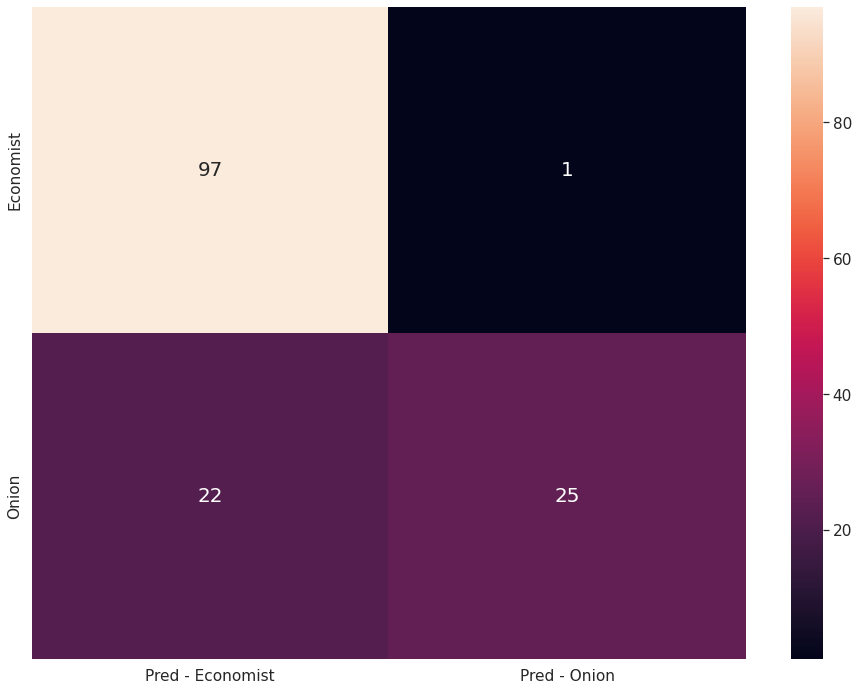

In [47]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, ["Economist", "Onion"], ["Pred - Economist", "Pred - Onion"])#, range(2))
plt.figure(figsize=(16,12))

sn.set(font_scale=1.4) # label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20})
plt.show()

In [50]:
sum(y_train) / len(y_train)

0.27241379310344827

- Of the 47 onion-labelled (label = 1) test samples, the model gets 25 correct (True Positives), hence its TPR, True Positive Rate, is just about 50%
- Meanwhile the model's TNR is close to 100%, as it only misses 1 economist article (1 False Positive)
- This is likely, because only 27.24% of the train data is from the Onion (label = 1), hence the prior probability in the Naive Bayes for The Economist is ~73%, so by default every sample is much more likely to be classified as being from The Economist
- There are likely some very specific satire words that can shift the probability distribution & make some article be predicted as coming from the Onion, but if these words are not there, it will result in a False Negative

##### Task 2

Calculate and report the precision and recall considering the articles from The Onion as
the positive class.

In [51]:
# Precision = TP / (TP + FP) - How many selected items are relevant?
prec_onion = 25 / (25 + 1)

# Recall = TP / P - How many relevant items are selected?
rec_onion = 25 / (25 + 22)

print(f"Precision: {prec_onion}\nRecall: {rec_onion}")

Precision: 0.9615384615384616
Recall: 0.5319148936170213


- Precision is very high for onion, since as explained due to the large difference in prior probabilities, ceteris paribus, the model will assume a text to be from the economist.
- The recall or true positive rate is just about 50%, i.e. whether an article from the onion will actually be labelled as such, is just a coin flip

##### Task 3

 Calculate and report the precision and recall considering the articles from The Economist
as the positive class

In [53]:
# Precision = TP / (TP + FP) - How many selected items are relevant?
prec_econ = 97 / (97 + 22)

# Recall = TP / P - How many relevant items are selected?
rec_econ = 97 / (97 + 1)

print(f"Precision: {prec_econ}\nRecall: {rec_econ}")

Precision: 0.8151260504201681
Recall: 0.9897959183673469


- Recall (actually TNR in this case) is close to 100%, as all except one econ articles, are classified as such
- Precision is slightly lower, as a lot of irrelevant onion articles are mixed in

##### Task 4

What is the misclassification rate of Naive Bayes on this problem?

In [56]:
# Misclassification rate = 1 - Accuracy = FP + FN / total

misclf = 22 + 1 / len(y_test)

print(f"Misclassification rate: {misclf}")

Misclassification rate: 22.00689655172414


- The misclassification rate is 22% - Inversely the accuracy of our classifier is 78%

##### Task 5

What is the true class of the 38th observation? What is its predicted class? What are the
estimated posterior probabilities for the 38th observation according to Naive Bayes?


In [98]:
# I will assume this refers to the 38th test observation & hence the 37th index (assuming the statement was 1-indexed)

gt = y_test[37:38]
pred = y_pred[37:38]

# Sci-kit gives us the log posterior probabilities, as they are numerically more stable
# Under the hood, they just add log(p_1) + log(p_2) ..., which is equivalent to log(p_1 * p_2) ... but more stable
probas_log = clf._joint_log_likelihood(x_test[37:38, :])

# Hence we can get the original probabilities by just exponentiating the log out again
probas_raw = np.exp(probas_log)


print(f"Ground Truth: {gt}, Prediction: {pred} with log probabilities: {probas_log} & raw probabilities: {probas_raw}")

Ground Truth: [0.], Prediction: [0.] with log probabilities: [[-11188.48018348 -11247.75136325]] & raw probabilities: [[0. 0.]]


- The true class is 0, the prediction 0
- The raw posterior probabilities are too small to be displayed - but the log probabilities are close to each other with the one for 0 being slightly higher

In [104]:
class_prior_probs = np.exp(clf.class_log_prior_)
dist = y_train.sum() / len(y_train)


print(f"Distribution is {1-dist}, {dist} - Prior probas are {class_prior_probs}")

Distribution is 0.7275862068965517, 0.27241379310344827 - Prior probas are [0.72758621 0.27241379]


- We can confirm that our method above is correct by checking that the prior probabilities match our data distribution